In [25]:
%load_ext tikzmagic
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
import control
from control.matlab import *

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


<center>EE3011 Modeling and Control Part II</center>

<center>Asst Prof. Mo Yilin</center>

<center>School of EEE</center>
<center>Room:S1-B1c-104; EXT: 4551</center>
<center>ylmo@ntu.edu.sg</center>


<center>Contents</center>

# Frequency Domain Analysis (6 Hours)
+ Bode plots of transfer functions
+ Frequency domain modeling
+ Nyquist stability 
+ Relative stability

# Frequency Domain Design (3 hours)
+ Lead compensator
+ Lag compensator

# PID Tuning (2 hours)

# Overview (1 hour)

<center>Quizzes</center>

# Quiz 3 (8%) 
- Date: 19-Oct-2016, Wednesday (week 10)
- Time: 10:00am-10:20am (during lecture time)
- Venue: LT22
- Content: Tut#7 and Tut #8

# Quiz 4 (8%) 
- Date: 31-Oct-2016, Monday (Week 12) 
- Time: 12:00nn-12:20pm (during lecture time)
- Content: Tut#9 and Tut#10


# Text:
K. Ogata, Modern Control Engineering, 5th Edition, Prentice Hall, 2010.

# References:
- [1] R.C. Dorf and R.H. Bishop, Modern Control Systems,9th Edition, Prentice Hall, 2000.
- [2] G.E. Franklin, J.D. Powell and A.Emami-Naeini, Feedback Control of Dynamic Systems, 4th Edition, Prentice Hall, 2002. 
- [3] L. Qiu and K. Zhou, Introduction to Feedback Control, Pearson Education International, 2010.



Chapter 1 FREQUENCY DOMAIN ANALYSIS 
# Introduction
Review of time domain analysis
- System modeling
- Time-domain responses systems of control
- Routh-Hurwitz Criterion and Root locus for stability analysis
- Time-domain specifications:
	+ rise time
	+ settling time
	+ maximum overshoot
	+ steady-state error


Why do we need to introduce frequency domain approaches for control systems?
- Frequency response characteristics of elements having complex dynamics can be obtained experimentally
- Controller design can be carried out by shaping the frequency response of open-loop systems
- Control systems may be designed so that the effects of undesirable noises/ disturbances are negligible.

# Frequency Response

The frequency response of a system is defined as the **steady-state response** of the system to **a sinusoidal input**.

RC-Network

\begin{align*}
  \frac{V_0(s)}{V_i(s)}= \frac{1/sC}{R+1/sC} = \frac{1}{\tau s+1},\,\tau=RC.
\end{align*}

\begin{align*}
  v_i(t) = 2\sin(\omega t+ 30^\circ)
\end{align*}

Assuming $R = 1k\Omega$, $C = 10^{-4}F$, then $\tau = 0.1s$.

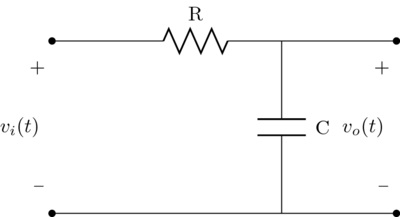

In [40]:
%%tikz -p circuitikz
\draw (0,0) to [short, *-*] (6,0);
\draw (0,3) to [short, *-] (1,3)
to [R,l=R] (4,3) 
to [short, -*] (6,3);
\draw (4,3) to [C,l=C] (4,0);
\draw (0,0) to [open, american voltages, v^>=${v}_i(t)$] (0,3);
\draw (6,0) to [open, american voltages, v^>=${v}_o(t)$] (6,3);

<function matplotlib.pyplot.show>

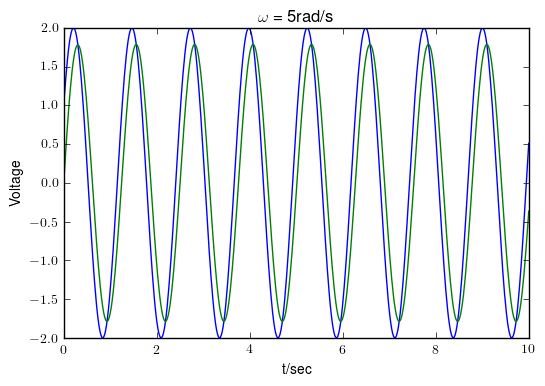

In [29]:
%matplotlib inline

R = 1e3
C = 1e-4
τ = R * C
sys = tf([1],[τ,1])
t = np.linspace(0,10,500)
ω = 5
vi = 2 * np.sin(ω * t+30*2*np.pi/360)
_, vo, _ = control.forced_response(sys,t,vi)

plt.plot(t,vi)
plt.plot(t,vo)
plt.xlabel(r't/sec')
plt.ylabel(r'Voltage');
plt.title(r'$\omega$ = 5rad/s')
plt.show

<function matplotlib.pyplot.show>

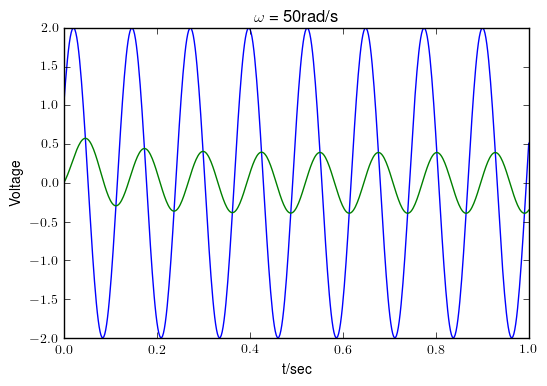

In [28]:
%matplotlib inline

R = 1e3
C = 1e-4
τ = R * C
sys = tf([1],[τ,1])
t = np.linspace(0,1,500)
ω = 50
vi = 2 * np.sin(ω * t+30*2*np.pi/360)
_, vo, _ = control.forced_response(sys,t,vi)

plt.plot(t,vi)
plt.plot(t,vo)
plt.xlabel(r't/sec')
plt.ylabel(r'Voltage');
plt.title(r'$\omega$ = 50rad/s')
plt.show

+ Consider a stable system:
\begin{align*}
  G(s) = \frac{a(s)}{b(s)}=\frac{a(s)}{(s+p_1)\dots(s+p_n)},
\end{align*}
where $p_i$ are assumed to be distinct poles.

+ Consider the input $r(t) = A\sin(\omega t)$ whose Laplace transform is $R(s) = \frac{A\omega}{s^2+\omega^2}$.

+ The output is given by
\begin{align*}
  Y(s) &= G(s)R(s) \\
       &=  \frac{a(s)}{(s+p_1)\dots(s+p_n)}\times \frac{A\omega}{s^2+\omega^2} \\
       &=\frac{k_1}{s+p_1}+\frac{k_2}{s+p_2}+\dots+\frac{k_n}{s+p_n} + \frac{\alpha}{s+j\omega} + \frac{\beta}{s+j\omega}.
\end{align*}

\begin{align*}
  R(s) = \frac{A\omega}{s^2+\omega^2} = \frac{A\omega}{(s+j\omega)(s-j\omega)}
\end{align*}
\begin{align*}
  \alpha = \lim_{s\rightarrow -j\omega}G(s)R(s) = -\frac{A}{2j}G(-j\omega).
\end{align*}
Similarly,
\begin{align*}
  \beta = \lim_{s\rightarrow -j\omega}G(s)R(s) = -\frac{A}{2j}G(-j\omega).
\end{align*}
